In [1]:
"""Market Basket Analisys menggunakan Python"""

# Import Libary
# Operasi Dasar
import numpy as np
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

# Market Basket Analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [7]:
# Membaca DataSet
data = pd.read_csv('S:/Learning/MATA KULIAH/DATA MINING/Market-Basket-Optimalization/Market_Basket_Optimisation.csv', header = None)

NameError: name 'pd' is not defined

In [14]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\USER\AppData\Local\Programs\Python\Python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-5a0hfmvx\\wordcloud_506b08e4d9c84ea89587d00ef9b6fd6e\\setup.py'"'"'; __file__='"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-5a0hfmvx\\wordcloud_506b08e4d9c84ea89587d00ef9b6fd6e\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\US

In [ ]:
# Melihat Ukuran Data
data.shape

(7501, 20)

In [ ]:
# Melihat Beberapa Data yang Paling Atas
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


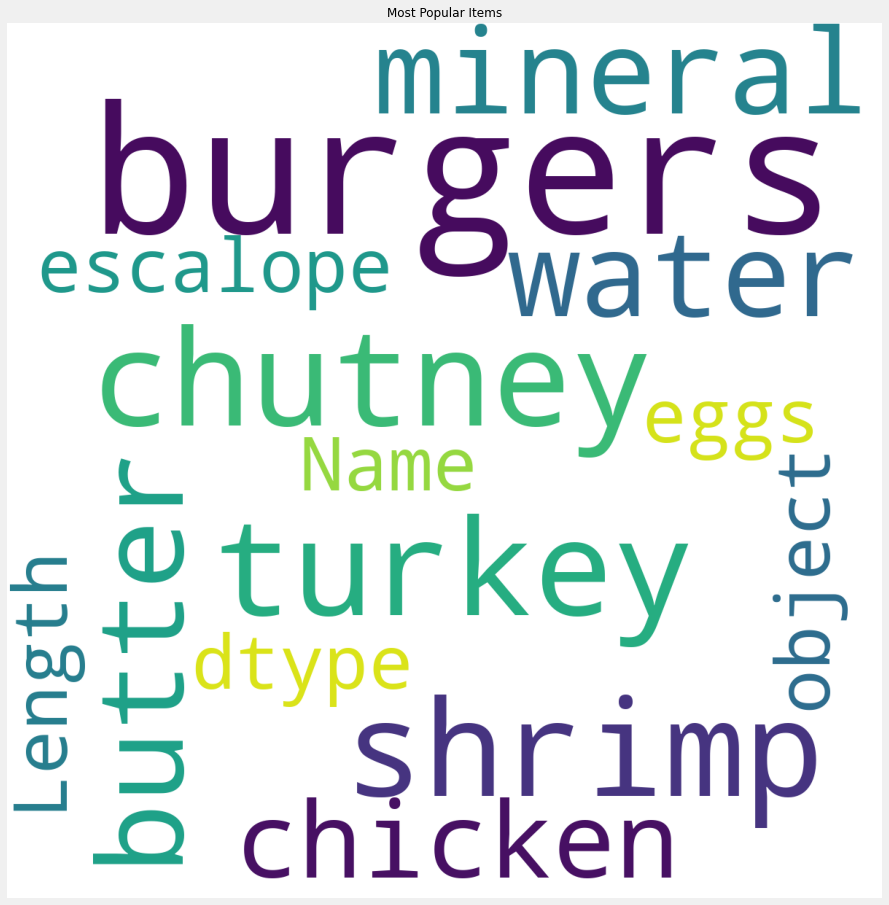

In [ ]:
# Visualisasi Menggunakan Wordcloud
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 12)
plt.show()

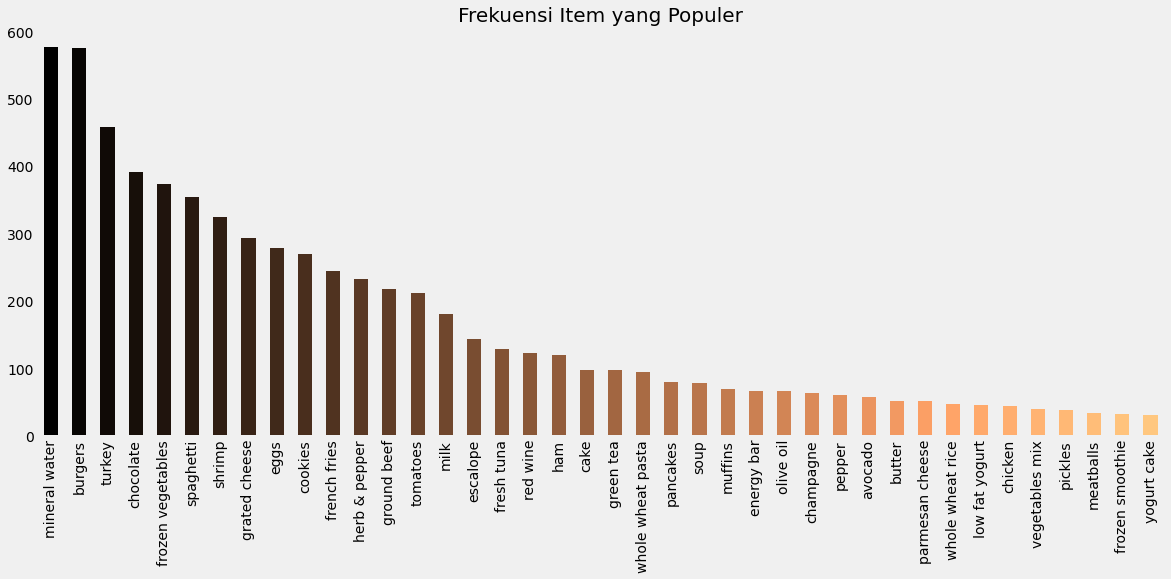

In [ ]:
# Melihat Frekuensi Item Paling Populer
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('Frekuensi Item yang Populer', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

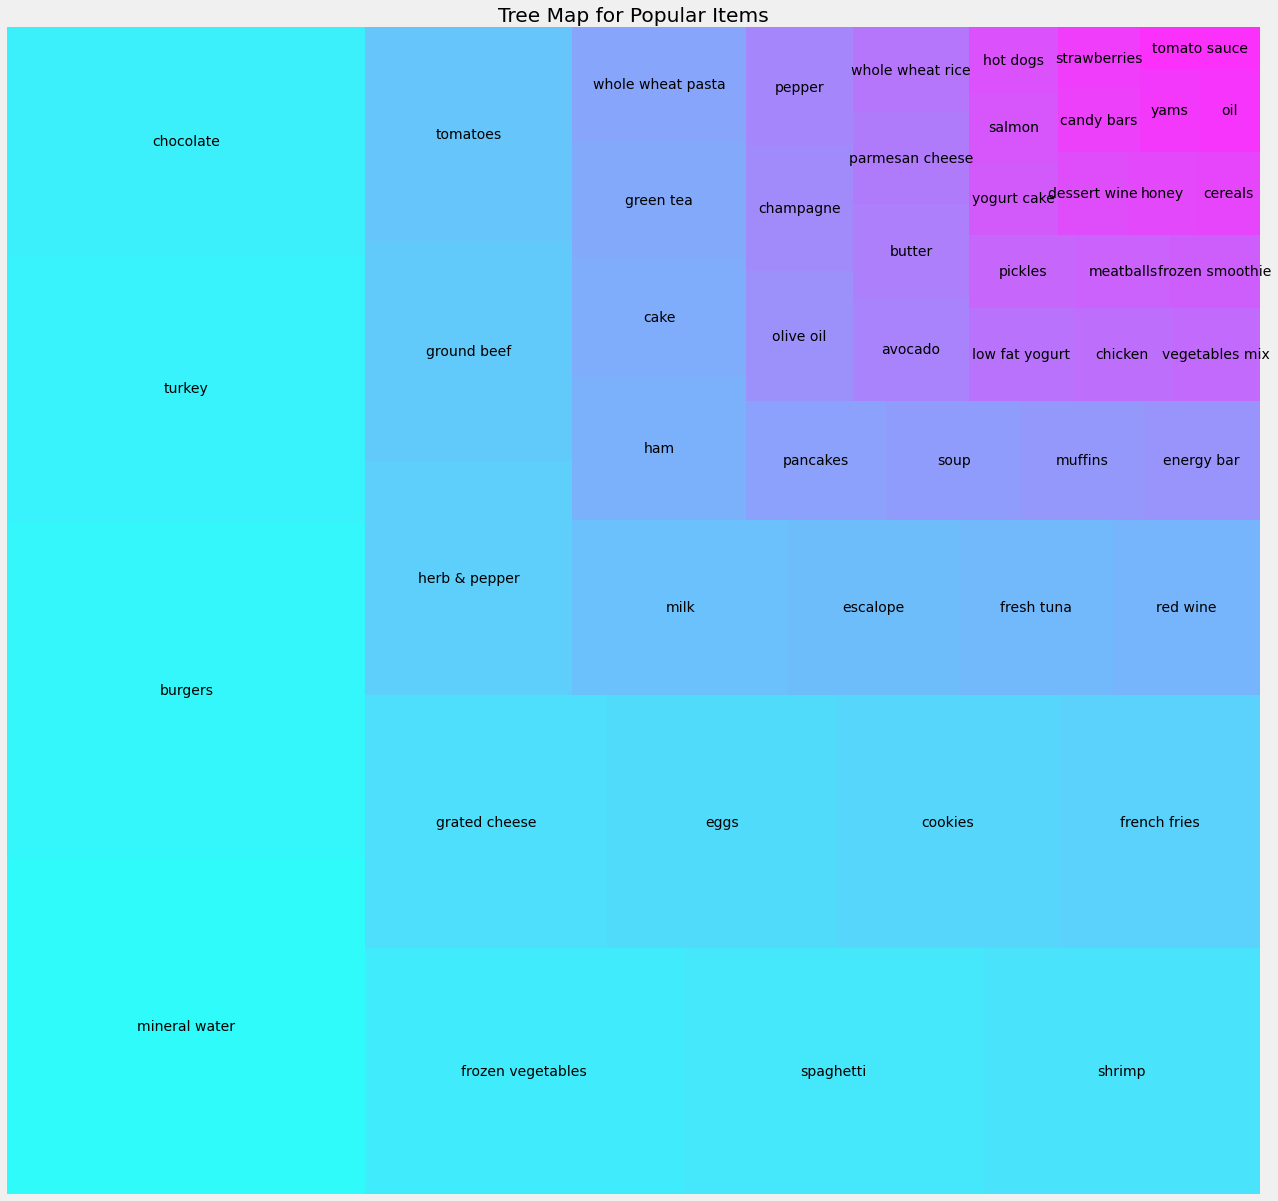

In [ ]:
# Visualisasi Menggunakan Tree Map (Peta Pohon)
y = data[0].value_counts().head(50).to_frame()
y.index# plotting a tree map
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Item Populer')
plt.axis('off')
plt.show()

In [ ]:
# Pre-Processing Data
# membuat setiap barang belanjaan pelanggan menjadi daftar yang identik 
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# mengubahnya menjadi array numpy 
trans = np.array(trans)

# Memeriksa Bentuknya
print(trans.shape)

(7501, 20)


In [ ]:
# Transaction Encoder
te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)
data.shape

(7501, 121)

In [ ]:
# Mereduksi Kolom Hingga Menjadi 40
# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 40

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]
data.shape

(7501, 40)

In [ ]:
# Mengecek Kolom Setelah Direduksi
data.columns

In [ ]:
# Menerapkan Algoritma Apriori
#Now, let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
204,0.010132,"(ground beef, mineral water, eggs)"
205,0.013065,"(mineral water, milk, eggs)"
206,0.011065,"(ground beef, mineral water, milk)"
207,0.010532,"(chocolate, eggs, spaghetti)"


In [ ]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# getting th item sets with length = 2 and support more than 1%
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
24,0.052660,"(mineral water, chocolate)",2
25,0.059725,"(mineral water, spaghetti)",2
26,0.050927,"(mineral water, eggs)",2
